<< Dice Detector >>

programmer: Ali Yaghoubian

In [152]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

_Image 0_

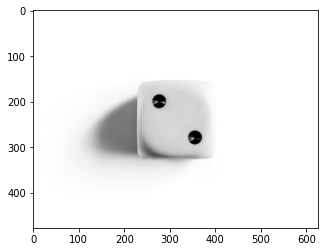

In [153]:
raw_img = cv2.imread('dice_picture/0.jpg')
gray_img = cv2.imread('dice_picture/0.jpg', cv2.IMREAD_GRAYSCALE)

plt.imshow(gray_img, cmap='gray')

[[1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1]]


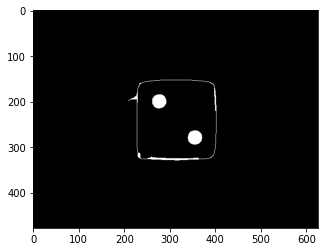

In [154]:
canny = cv2.Canny(gray_img, 10, 170, 3) # parameters : threshold 1 or 2 and edges

my_kernel = np.ones((13, 13), np.uint8)
print(my_kernel)

closing = cv2.morphologyEx(canny, cv2.MORPH_CLOSE, kernel=my_kernel)

plt.imshow(closing, cmap='gray')

[[[-1 -1 -1 -1]]]
1


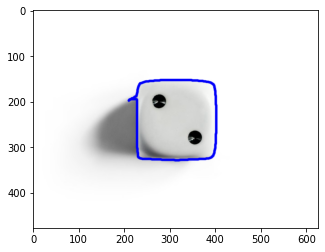

In [155]:
contours, hierarchy = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
print(hierarchy)
print(len(contours))

cv2.drawContours(raw_img, contours, -1, (0, 0, 250), thickness=3, lineType=cv2.LINE_AA)
        
x, y, w, h= cv2.boundingRect(contours[0])
# cv2.rectangle(raw_img, (x, y), (x + w, y + h), (0, 0, 250), 3)
        
plt.imshow(raw_img)

In [156]:
print(contours)
print(x, y, w, h)

(array([[[279, 153]],

       [[278, 154]],

       [[277, 154]],

       ...,

       [[282, 153]],

       [[281, 153]],

       [[280, 153]]], dtype=int32),)
210 153 193 177


In [157]:
result_number = cv2.HoughCircles(gray_img, cv2.HOUGH_GRADIENT, 1, 20, param1=40, param2=30, minRadius=1, maxRadius=30)
print(result_number)

[[[355.5 279.5  14.9]
  [276.5 199.5  14.5]]]


1
2
[355.5 279.5  14.9]
[276.5 199.5  14.5]


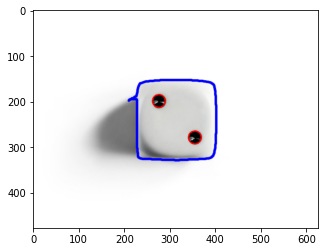

In [158]:
print(len(result_number))
result_number = result_number[0, :]
print(len(result_number))

for circle in result_number:
    print(circle)
    cv2.circle(raw_img, (int(circle[0]), int(circle[1])), int(circle[2]), (250, 0, 0), 2)
    
plt.imshow(raw_img)

In [159]:
dice_number = len(result_number)

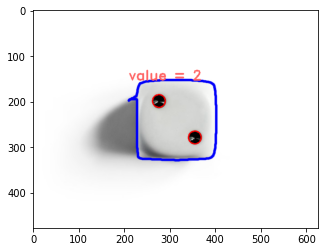

In [160]:
cv2.putText(raw_img, f'value = {dice_number}', (x, y), cv2.FONT_HERSHEY_DUPLEX, 1, (255, 100, 100), 2)
plt.imshow(raw_img)

*Image 1*

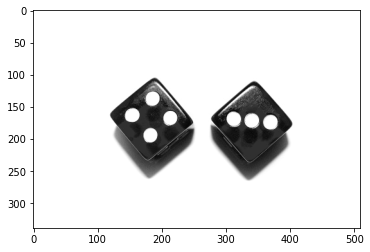

In [240]:
raw_img = cv2.imread('dice_picture/1.jpg')
gray_img = cv2.imread('dice_picture/1.jpg', cv2.IMREAD_GRAYSCALE)

plt.imshow(gray_img, cmap='gray')

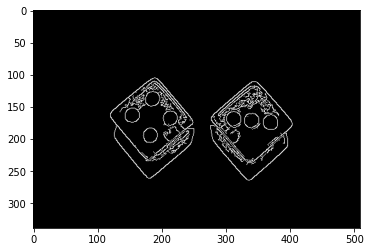

In [241]:
canny = cv2.Canny(gray_img, 10, 170, 3)

my_kernel = np.ones((1, 1), np.uint8)

closing = cv2.morphologyEx(canny, cv2.MORPH_CLOSE, kernel=my_kernel)

plt.imshow(closing, cmap='gray')

2


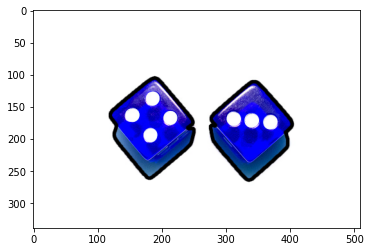

In [242]:
contours, hierarchy = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
print(len(contours))

cv2.drawContours(raw_img, contours, -1, (0, 0, 0), thickness=3, lineType=cv2.LINE_AA)
plt.imshow(raw_img)

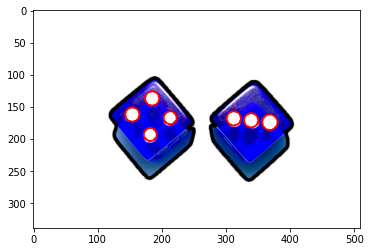

In [243]:
result_number = cv2.HoughCircles(gray_img, cv2.HOUGH_GRADIENT, 1, 20, param1=40, param2=30, minRadius=10, maxRadius=20)
result_number = result_number[0, :]

for circle in result_number:
    cv2.circle(raw_img, (int(circle[0]), int(circle[1])), int(circle[2]), (250, 0, 0), 2)
    
plt.imshow(raw_img)

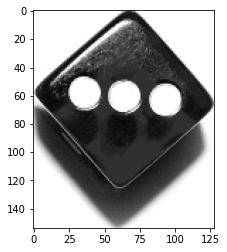

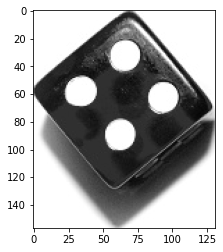

In [244]:
x0, y0, w0, h0= cv2.boundingRect(contours[0])
x1, y1, w1, h1= cv2.boundingRect(contours[1])

first_dice = gray_img[y0:y0+h0, x0:x0+w0]
second_dice = gray_img[y1:y1+h1, x1:x1+w1]

plt.imshow(first_dice, cmap='gray')
plt.show()
plt.imshow(second_dice, cmap='gray')
plt.show()

In [245]:
first_result = cv2.HoughCircles(first_dice, cv2.HOUGH_GRADIENT, 1, 20, param1=40, param2=30, minRadius=10, maxRadius=20)
first_result = first_result[0, :]
first_dice_number = len(first_result)

second_result = cv2.HoughCircles(second_dice, cv2.HOUGH_GRADIENT, 1, 20, param1=40, param2=30, minRadius=10, maxRadius=20)
second_result = second_result[0, :]
second_dice_number = len(second_result)

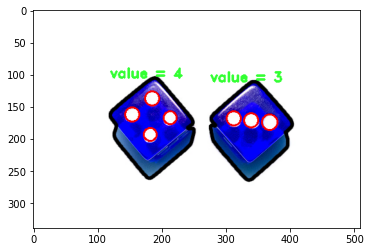

In [246]:
cv2.putText(raw_img, f'value = {first_dice_number}', (x0, y0), cv2.FONT_HERSHEY_DUPLEX, 0.7, (50, 255, 50), 2)
cv2.putText(raw_img, f'value = {second_dice_number}', (x1, y1), cv2.FONT_HERSHEY_DUPLEX, 0.7, (50, 255, 50), 2)

plt.imshow(raw_img)

*Image 2*

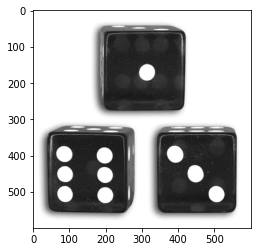

In [291]:
raw_img = cv2.imread('dice_picture/2.jpg')
gray_img = cv2.imread('dice_picture/2.jpg', cv2.IMREAD_GRAYSCALE)

plt.imshow(gray_img, cmap='gray')

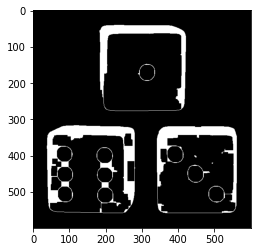

In [292]:
canny = cv2.Canny(gray_img, 10, 170, 3)

my_kernel = np.ones((15, 15), np.uint8)

closing = cv2.morphologyEx(canny, cv2.MORPH_CLOSE, kernel=my_kernel)

plt.imshow(closing, cmap='gray')

3


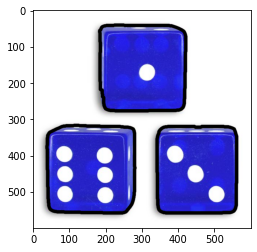

In [293]:
contours, hierarchy = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
print(len(contours))

cv2.drawContours(raw_img, contours, -1, (0, 0, 0), thickness=7, lineType=cv2.LINE_AA)
plt.imshow(raw_img)

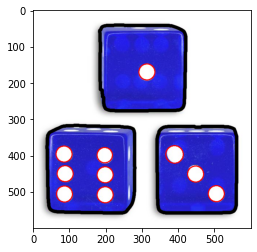

In [294]:
result_number = cv2.HoughCircles(gray_img, cv2.HOUGH_GRADIENT, 1, 20, param1=40, param2=30, minRadius=10, maxRadius=25)
result_number = result_number[0, :]

for circle in result_number:
    cv2.circle(raw_img, (int(circle[0]), int(circle[1])), int(circle[2]), (250, 0, 0), 2)
    
plt.imshow(raw_img)

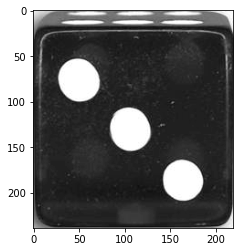

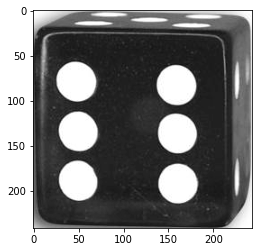

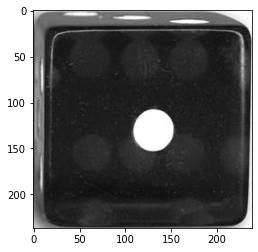

In [295]:
x0, y0, w0, h0= cv2.boundingRect(contours[0])
x1, y1, w1, h1= cv2.boundingRect(contours[1])
x2, y2, w2, h2= cv2.boundingRect(contours[2])

first_dice = gray_img[y0:y0+h0, x0:x0+w0]
second_dice = gray_img[y1:y1+h1, x1:x1+w1]
third_dice = gray_img[y2:y2+h2, x2:x2+w2]

plt.imshow(first_dice, cmap='gray')
plt.show()
plt.imshow(second_dice, cmap='gray')
plt.show()
plt.imshow(third_dice, cmap='gray')
plt.show()

In [296]:
first_result = cv2.HoughCircles(first_dice, cv2.HOUGH_GRADIENT, 1, 20, param1=40, param2=30, minRadius=10, maxRadius=25)
first_result = first_result[0, :]
first_dice_number = len(first_result)

second_result = cv2.HoughCircles(second_dice, cv2.HOUGH_GRADIENT, 1, 20, param1=40, param2=30, minRadius=10, maxRadius=25)
second_result = second_result[0, :]
second_dice_number = len(second_result)

third_result = cv2.HoughCircles(third_dice, cv2.HOUGH_GRADIENT, 1, 20, param1=40, param2=30, minRadius=10, maxRadius=25)
third_result = third_result[0, :]
third_dice_number = len(third_result)

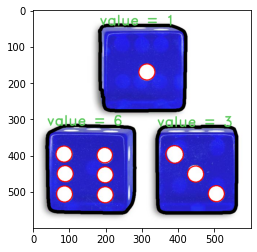

In [297]:
cv2.putText(raw_img, f'value = {first_dice_number}', (x0, y0), cv2.FONT_HERSHEY_DUPLEX, 1.3, (90, 200, 90), 2)
cv2.putText(raw_img, f'value = {second_dice_number}', (x1, y1), cv2.FONT_HERSHEY_DUPLEX, 1.3, (90, 200, 90), 2)
cv2.putText(raw_img, f'value = {third_dice_number}', (x2, y2), cv2.FONT_HERSHEY_DUPLEX, 1.3, (90, 200, 90), 2)

plt.imshow(raw_img)

*Image 3*

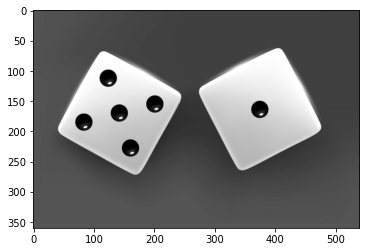

In [314]:
raw_img = cv2.imread('dice_picture/3.jpg')
gray_img = cv2.imread('dice_picture/3.jpg', cv2.IMREAD_GRAYSCALE)

plt.imshow(gray_img, cmap='gray')

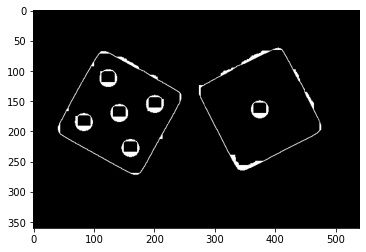

In [315]:
canny = cv2.Canny(gray_img, 10, 170, 3)

my_kernel = np.ones((15, 15), np.uint8)

closing = cv2.morphologyEx(canny, cv2.MORPH_CLOSE, kernel=my_kernel)

plt.imshow(closing, cmap='gray')

2


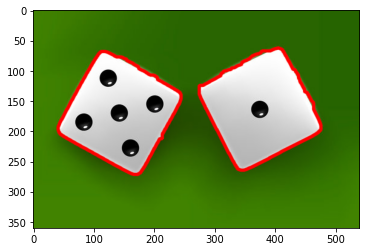

In [316]:
contours, hierarchy = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
print(len(contours))

cv2.drawContours(raw_img, contours, -1, (255, 0, 0), thickness=3, lineType=cv2.LINE_AA)
plt.imshow(raw_img)

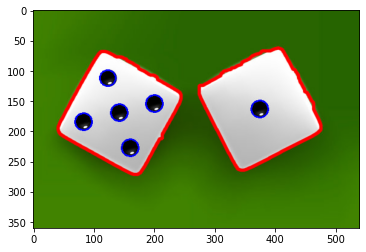

In [317]:
result_number = cv2.HoughCircles(gray_img, cv2.HOUGH_GRADIENT, 1, 20, param1=40, param2=30, minRadius=10, maxRadius=25)
result_number = result_number[0, :]

for circle in result_number:
    cv2.circle(raw_img, (int(circle[0]), int(circle[1])), int(circle[2]), (0, 0, 255), 2)
    
plt.imshow(raw_img)

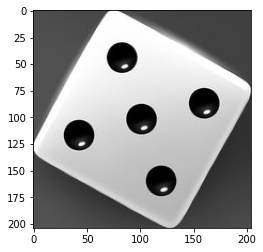

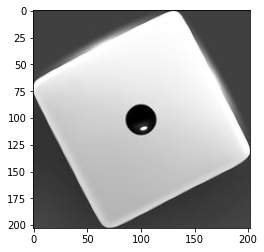

In [318]:
x0, y0, w0, h0= cv2.boundingRect(contours[0])
x1, y1, w1, h1= cv2.boundingRect(contours[1])

first_dice = gray_img[y0:y0+h0, x0:x0+w0]
second_dice = gray_img[y1:y1+h1, x1:x1+w1]

plt.imshow(first_dice, cmap='gray')
plt.show()
plt.imshow(second_dice, cmap='gray')
plt.show()

In [319]:
first_result = cv2.HoughCircles(first_dice, cv2.HOUGH_GRADIENT, 1, 20, param1=40, param2=30, minRadius=10, maxRadius=25)
first_result = first_result[0, :]
first_dice_number = len(first_result)

second_result = cv2.HoughCircles(second_dice, cv2.HOUGH_GRADIENT, 1, 20, param1=40, param2=30, minRadius=10, maxRadius=25)
second_result = second_result[0, :]
second_dice_number = len(second_result)

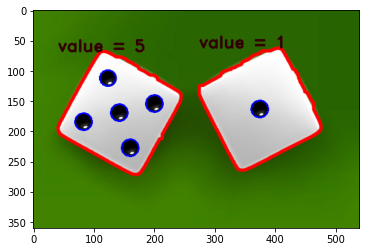

In [320]:
cv2.putText(raw_img, f'value = {first_dice_number}', (x0, y0), cv2.FONT_HERSHEY_DUPLEX, 0.9, (50, 0, 0), 2)
cv2.putText(raw_img, f'value = {second_dice_number}', (x1, y1), cv2.FONT_HERSHEY_DUPLEX, 0.9, (50, 0, 0), 2)

plt.imshow(raw_img)